In [1]:
# Crime by Day of Year: 2010-2018

In [2]:
import pandas as pd
import datetime

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
crime_sets = dict()
for year in range(2010,2019):
    crime_sets[str(year)] = pd.read_csv('data/crime/USA_Crime_Incidents_in_{}.csv'.format(year))

In [4]:
crime_merged = pd.concat(crime_sets)
offense_types = list(set(crime_merged['OFFENSE']))

In [5]:
crime_merged.head()

X          Y      CCN                REPORT_DAT     SHIFT  \
2010 0 -76.975118  38.917289   100060  2010-07-16T14:00:00.000Z       DAY   
     1 -76.988297  38.927723  4172632  2010-01-21T00:00:00.000Z  MIDNIGHT   
     2 -76.957528  38.888178  6098962  2010-08-31T00:00:00.000Z  MIDNIGHT   
     3 -77.072294  38.921513  7151899  2010-09-14T00:00:00.000Z  MIDNIGHT   
     4 -76.995239  38.925427  9016047  2010-01-12T17:50:00.000Z   EVENING   

        METHOD                     OFFENSE  \
2010 0  OTHERS                THEFT F/AUTO   
     1     GUN                    HOMICIDE   
     2     GUN                    HOMICIDE   
     3  OTHERS                    HOMICIDE   
     4  OTHERS  ASSAULT W/DANGEROUS WEAPON   

                                           BLOCK    XBLOCK    YBLOCK  ...  \
2010 0   1800 - 2299 BLOCK OF NEW YORK AVENUE NE  402158.0  138824.0  ...   
     1       HAMLIN STREET NE AND 13TH STREET NE  401015.0  139982.0  ...   
     2         100 - 199 BLOCK OF 34TH STREET SE  403685.0  135593.0  ...   
     3  2301 - 2499 BLOCK OF WISCONSIN AVENUE NW  393731.0  139295.0  ...   
     4     710 - 799 BLOCK OF EDGEWOOD STREET NE  400413.0  139727.0  ...   

        BLOCK_GROUP CENSUS_TRACT  VOTING_PRECINCT   LATITUDE  LONGITUDE  BID  \
2010 0     011100 3      11100.0      Precinct 72  38.917282 -76.975116  NaN   
     1     009302 1       9302.0      Precinct 73  38.927715 -76.988294  NaN   
     2     007708 1       7708.0     Precinct 132  38.888171 -76.957526  NaN   
     3     000300 1        300.0      Precinct 11  38.921505 -77.072292  NaN   
     4     009204 2       9204.0      Precinct 74  38.925419 -76.995237  NaN   

                      START_DATE                  END_DATE   OBJECTID  \
2010 0  2010-07-15T13:37:00.000Z  2010-07-15T13:40:00.000Z  332101471   
     1  2004-12-19T00:45:00.000Z  2004-12-19T00:50:00.000Z  332101479   
     2  2006-07-23T01:40:00.000Z  2006-07-23T01:40:00.000Z  332101483   
     3  2007-11-03T20:12:00.000Z  2007-11-03T20:15:00.000Z  332101496   
     4  2010-01-11T19:51:00.000Z                       NaN  332138320   

        OCTO_RECORD_ID  
2010 0     00100060-01  
     1     04172632-01  
     2     06098962-01  
     3     07151899-01  
     4     09016047-01  

[5 rows x 25 columns]

In [6]:
crime_merged['CRIME_DAY'] = pd.to_datetime(crime_merged['START_DATE']).dt.date


In [7]:
#remove reports of crimes outside our range of interest
crime_merged = crime_merged[pd.to_datetime(crime_merged['CRIME_DAY']) >= pd.to_datetime('2010-01-01')]

In [8]:
crime_merged.head()

X          Y       CCN                REPORT_DAT    SHIFT  \
2010 0 -76.975118  38.917289    100060  2010-07-16T14:00:00.000Z      DAY   
     4 -76.995239  38.925427   9016047  2010-01-12T17:50:00.000Z  EVENING   
     6 -76.983658  38.889239  10001331  2010-01-04T07:24:00.000Z      DAY   
     7 -76.997328  38.885141  10001335  2010-01-04T07:30:00.000Z      DAY   
     8 -77.014644  38.905022  10001337  2010-01-04T07:45:00.000Z      DAY   

        METHOD                     OFFENSE  \
2010 0  OTHERS                THEFT F/AUTO   
     4  OTHERS  ASSAULT W/DANGEROUS WEAPON   
     6  OTHERS                THEFT F/AUTO   
     7  OTHERS                    BURGLARY   
     8  OTHERS                     ROBBERY   

                                            BLOCK    XBLOCK    YBLOCK  ...  \
2010 0    1800 - 2299 BLOCK OF NEW YORK AVENUE NE  402158.0  138824.0  ...   
     4      710 - 799 BLOCK OF EDGEWOOD STREET NE  400413.0  139727.0  ...   
     6             1 - 99 BLOCK OF 15TH STREET SE  401418.0  135710.0  ...   
     7  600 - 669 BLOCK OF PENNSYLVANIA AVENUE SE  400232.0  135255.0  ...   
     8  1102 - 1179 BLOCK OF NEW JERSEY AVENUE NW  398730.0  137462.0  ...   

        CENSUS_TRACT VOTING_PRECINCT   LATITUDE  LONGITUDE  \
2010 0       11100.0     Precinct 72  38.917282 -76.975116   
     4        9204.0     Precinct 74  38.925419 -76.995237   
     6        6700.0     Precinct 88  38.889231 -76.983655   
     7        6500.0     Precinct 89  38.885133 -76.997326   
     8        4701.0      Precinct 1  38.905014 -77.014642   

                              BID                START_DATE  \
2010 0                        NaN  2010-07-15T13:37:00.000Z   
     4                        NaN  2010-01-11T19:51:00.000Z   
     6                        NaN  2010-01-03T08:00:00.000Z   
     7               CAPITOL HILL  2010-01-04T07:00:00.000Z   
     8  MOUNT VERNON TRIANGLE CID  2010-01-04T07:15:00.000Z   

                        END_DATE   OBJECTID  OCTO_RECORD_ID   CRIME_DAY  
2010 0  2010-07-15T13:40:00.000Z  332101471     00100060-01  2010-07-15  
     4                       NaN  332138320     09016047-01  2010-01-11  
     6  2010-01-04T07:00:00.000Z  332166210     10001331-01  2010-01-03  
     7  2010-01-04T07:05:00.000Z  332166211     10001335-01  2010-01-04  
     8                       NaN  332166212     10001337-01  2010-01-04  

[5 rows x 26 columns]

In [9]:
#group by day and count number of each type of offense
crime_grouped = crime_merged.groupby(by=['CRIME_DAY','OFFENSE']).agg({'CCN':'count'}).reindex()
#pivot back to make offenses columns
crime_daily = crime_grouped.unstack(-1)
crime_daily.columns= crime_daily.columns.droplevel()


In [10]:
days_df = pd.DataFrame(dict({'date':pd.date_range(start='2010/01/01',end='2018/12/31')}))
days_df.index = days_df['date']
days_df['DAY'] = days_df['date'].dt.weekday_name
days_df['MONTH'] = days_df['date'].dt.month_name()

days_df.drop('date', axis=1, inplace=True)
days_df.head()

,DAY,MONTH
date,,
2010-01-01,Friday,January
2010-01-02,Saturday,January
2010-01-03,Sunday,January
2010-01-04,Monday,January
2010-01-05,Tuesday,January


In [11]:
#join data frame to an index containing every day, so that we have rows for days where there was no crime
# first made data frame for each day
days_df = pd.DataFrame(dict({'date':pd.date_range(start='2010/01/01',end='2018/12/31')}))
days_df.index = days_df['date']
days_df['DAY'] = days_df['date'].dt.weekday_name
days_df['MONTH'] = days_df['date'].dt.month_name()

days_df.drop('date', axis=1, inplace=True)


#then join to the crime data
crime_daily = days_df.join(crime_daily, how = 'left')


#clean up NA values where there were no reported crimes
crime_daily = crime_daily.fillna(0)
crime_daily.head()

,DAY,MONTH,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
date,,,,,,,,,,,
2010-01-01,Friday,January,0.0,10.0,9.0,0.0,10.0,3.0,0.0,17.0,28.0
2010-01-02,Saturday,January,0.0,3.0,7.0,1.0,7.0,2.0,1.0,20.0,23.0
2010-01-03,Sunday,January,0.0,5.0,2.0,0.0,11.0,7.0,0.0,15.0,8.0
2010-01-04,Monday,January,0.0,4.0,7.0,0.0,9.0,9.0,0.0,21.0,19.0
2010-01-05,Tuesday,January,0.0,3.0,12.0,0.0,5.0,9.0,1.0,20.0,20.0


In [30]:
#plot: Crime by Month (2010-2018)
dplot = pd.DataFrame(crime_daily, columns = ['ROBBERY','SEX ABUSE','THEFT F/AUTO','THEFT/OTHER' ,'MONTH'])
dplot.head()

,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,MONTH
date,,,,,
2010-01-01,3.0,0.0,17.0,28.0,January
2010-01-02,2.0,1.0,20.0,23.0,January
2010-01-03,7.0,0.0,15.0,8.0,January
2010-01-04,9.0,0.0,21.0,19.0,January
2010-01-05,9.0,1.0,20.0,20.0,January


Text(0, 0.5, 'Average')

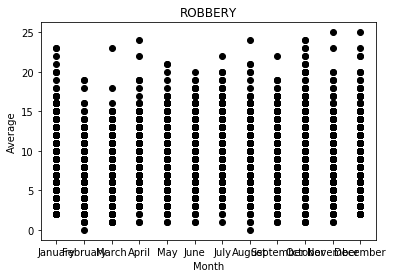

In [26]:
plt.scatter(dplot['MONTH'],dplot['ROBBERY'], c = 'black')
plt.title('ROBBERY')
plt.xlabel('Month')
plt.ylabel('Average')


Text(0, 0.5, 'Average')

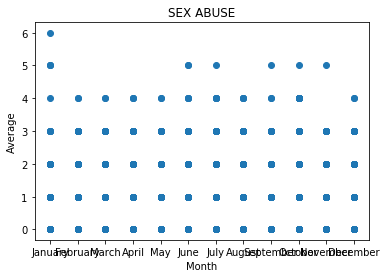

In [27]:
plt.scatter(dplot['MONTH'],dplot['SEX ABUSE'])
plt.title('SEX ABUSE')
plt.xlabel('Month')
plt.ylabel('Average')

Text(0, 0.5, 'Average')

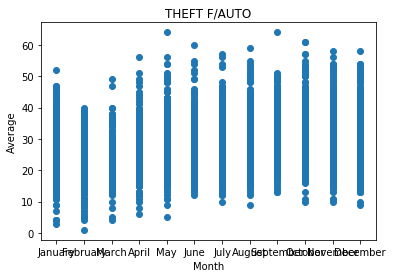

In [28]:
plt.scatter(dplot['MONTH'],dplot['THEFT F/AUTO'])
plt.title('THEFT F/AUTO')
plt.xlabel('Month')
plt.ylabel('Average')

Text(0, 0.5, 'Average')

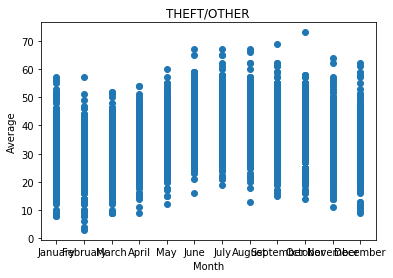

In [29]:
plt.scatter(dplot['MONTH'],dplot['THEFT/OTHER'])
plt.title('THEFT/OTHER')
plt.xlabel('Month')
plt.ylabel('Average')

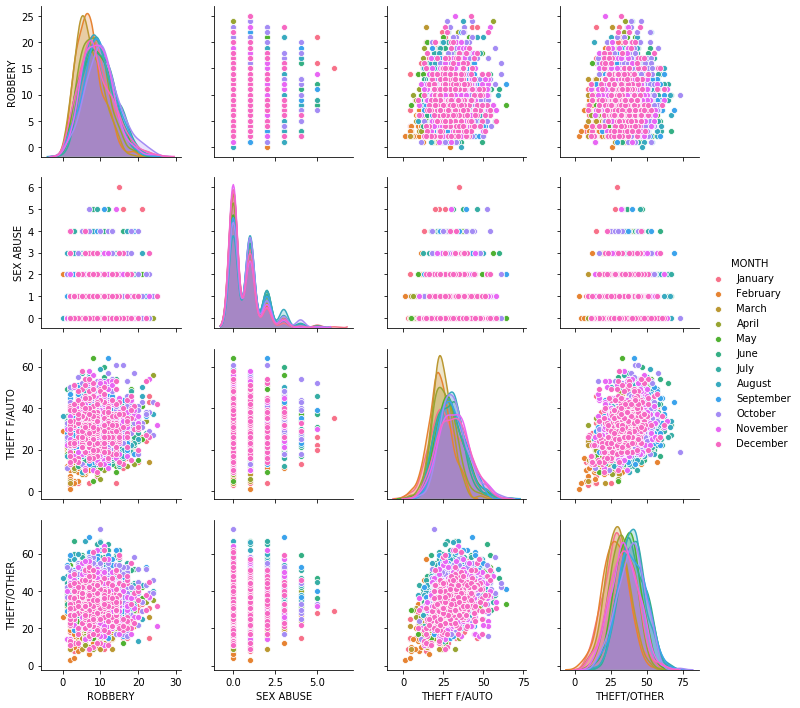

In [32]:
import seaborn as sns
sns.pairplot(dplot, hue='MONTH')